# 2.1 Keras 학습과정 확인
이번 실습에서는 모델이 학습하는 동안 변화하는 학습양상을 확인하는 방법을 알아본다  

In [1]:
import tensorflow.keras.utils as utils
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation

import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, Y_train),(X_test, Y_test) = datasets.mnist.load_data()
X_train_flat = X_train.reshape(60000, 28*28).astype('float32')/255.0
X_test_flat = X_test.reshape(10000, 28*28).astype('float32')/255.0
Y_train_onehot = utils.to_categorical(Y_train)
Y_test_onehot = utils.to_categorical(Y_test)

n_in = 28*28
n_out = np.shape(Y_test_onehot)[1]

In [3]:
def DNN_seq(n_in, n_out):
    model = Sequential()
    model.add(Dense(units =128, input_shape=(n_in,), activation='relu'))
    model.add(Dense(units =32, activation='relu'))
    model.add(Dense(units =n_out, activation='softmax'))
    return model

In [4]:
model = DNN_seq(n_in, n_out)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

## (1) Keras Callback
model의 fit() 함수로 학습을 진행하는 동안, 매 epoch마다 지정한 함수를 호출할 수 있음

ModelCheckpoint : 학습 중 모델 저장

EarlyStopping : 학습양상을 보고 학습을 조기에 종료

TensorBoard : tensorboard로 확인할 수 있도록 학습양상을 기록

외에 kereas.callbacks.Callback을 상속받아 원하는 callback 함수를 만들 수 있음
    
https://keras.io/callbacks/

In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, TensorBoard
import os
import datetime

학습과정을 저장할 directory 생성

In [6]:
def make_dir(path):
    today = str(datetime.date.today())
    path_date = path+'/'+today
    
    if not os.path.exists(path_date):
        os.makedirs(path_date)
    return path_date

In [7]:
model_path=make_dir('./model')
tensorboard_path=make_dir('./tensorboard')

modelconfig = str(n_in)+'_'+str(n_out)
model_name_path = model_path+'/'+modelconfig+"_{epoch:02d}-{loss:.4f}_{val_loss:.4f}_{val_accuracy:.4f}.h5"

print(model_name_path)
print(tensorboard_path)

./model/2021-06-16/784_10_{epoch:02d}-{loss:.4f}_{val_loss:.4f}_{val_accuracy:.4f}.h5
./tensorboard/2021-06-16


필요한 callback 함수들을 정의하고 list로 fit() 함수에 전달

In [8]:
checkpointer=ModelCheckpoint(filepath=model_name_path, monitor='val_accuracy', verbose=0, save_best_only=True)
tb_saver = TensorBoard(log_dir=tensorboard_path, write_graph=True)
earlystopper = EarlyStopping(monitor='val_accuracy', patience=40, verbose=0, mode='auto')

callback_list=[checkpointer, tb_saver, earlystopper]

In [9]:
history = model.fit(X_train_flat, Y_train_onehot, batch_size=256, epochs=50, validation_split=0.3, verbose=2, callbacks = callback_list)

Epoch 1/50
165/165 - 3s - loss: 0.5318 - accuracy: 0.8489 - val_loss: 0.2547 - val_accuracy: 0.9257
Epoch 2/50
165/165 - 1s - loss: 0.2123 - accuracy: 0.9393 - val_loss: 0.1924 - val_accuracy: 0.9434
Epoch 3/50
165/165 - 1s - loss: 0.1569 - accuracy: 0.9543 - val_loss: 0.1717 - val_accuracy: 0.9524
Epoch 4/50
165/165 - 1s - loss: 0.1231 - accuracy: 0.9654 - val_loss: 0.1435 - val_accuracy: 0.9576
Epoch 5/50
165/165 - 1s - loss: 0.1033 - accuracy: 0.9697 - val_loss: 0.1256 - val_accuracy: 0.9630
Epoch 6/50
165/165 - 1s - loss: 0.0835 - accuracy: 0.9757 - val_loss: 0.1157 - val_accuracy: 0.9657
Epoch 7/50
165/165 - 1s - loss: 0.0697 - accuracy: 0.9800 - val_loss: 0.1216 - val_accuracy: 0.9640
Epoch 8/50
165/165 - 1s - loss: 0.0639 - accuracy: 0.9813 - val_loss: 0.1087 - val_accuracy: 0.9686
Epoch 9/50
165/165 - 1s - loss: 0.0504 - accuracy: 0.9863 - val_loss: 0.1082 - val_accuracy: 0.9692
Epoch 10/50
165/165 - 1s - loss: 0.0422 - accuracy: 0.9890 - val_loss: 0.1038 - val_accuracy: 0.9698

In [10]:
os.listdir(model_path)

['784_10_01-0.5318_0.2547_0.9257.h5',
 '784_10_02-0.2123_0.1924_0.9434.h5',
 '784_10_03-0.1569_0.1717_0.9524.h5',
 '784_10_04-0.1231_0.1435_0.9576.h5',
 '784_10_05-0.1033_0.1256_0.9630.h5',
 '784_10_06-0.0835_0.1157_0.9657.h5',
 '784_10_08-0.0639_0.1087_0.9686.h5',
 '784_10_09-0.0504_0.1082_0.9692.h5',
 '784_10_10-0.0422_0.1038_0.9698.h5',
 '784_10_13-0.0268_0.1041_0.9701.h5',
 '784_10_15-0.0204_0.1052_0.9707.h5',
 '784_10_21-0.0087_0.1184_0.9717.h5',
 '784_10_23-0.0065_0.1200_0.9718.h5',
 '784_10_24-0.0056_0.1201_0.9719.h5',
 '784_10_26-0.0051_0.1261_0.9728.h5',
 '784_10_32-0.0024_0.1354_0.9729.h5',
 '784_10_33-0.0011_0.1363_0.9735.h5',
 '784_10_34-0.0009_0.1357_0.9739.h5',
 '784_10_38-0.0016_0.1417_0.9746.h5',
 '784_10_48-0.0002_0.1516_0.9748.h5']

In [11]:
os.listdir(tensorboard_path)

['train', 'validation']

## (2) history 확인
fit() 함수는 history 객체를 반환함

history['loss']: epoch 마다 기록되는 train loss

history['accuracy'] : accuracy를 측정할 수 있는 문제이며 compile() 때 metric으로 accuracy를 지정하였다면 기록됨
    
history['val_loss'] : 검증 데이터가 있다면 기록되는 validation loss

history['val_accuracy'] : 검증 데이터가 있고 accuracy를 측정할 수 있다면 기록되는 validation accuracy 

In [12]:
print(history.history['loss'])

[0.5318015217781067, 0.21227288246154785, 0.1569414585828781, 0.1231389194726944, 0.10334660857915878, 0.08348777890205383, 0.06968624889850616, 0.06385735422372818, 0.05035721883177757, 0.04220737889409065, 0.036993350833654404, 0.03392716124653816, 0.026845283806324005, 0.02233240194618702, 0.02037007361650467, 0.01777596026659012, 0.014951731078326702, 0.013452541083097458, 0.011108026839792728, 0.009176901541650295, 0.008677219972014427, 0.007387063931673765, 0.00645816745236516, 0.005581721663475037, 0.0040374817326664925, 0.005124938208609819, 0.003514954587444663, 0.0024928729981184006, 0.007873821072280407, 0.010011953301727772, 0.005588277708739042, 0.0024064695462584496, 0.0010743828024715185, 0.0008838354842737317, 0.009908078238368034, 0.011602244339883327, 0.004543607588857412, 0.0016168715665116906, 0.0006865492323413491, 0.0004995922208763659, 0.00042548528290353715, 0.0006522196345031261, 0.00038741453317925334, 0.000315336772473529, 0.00029322979389689863, 0.0002648530

matplotlib를 이용하여 history 객체 내부에 저장된 값들을 graph로 표현

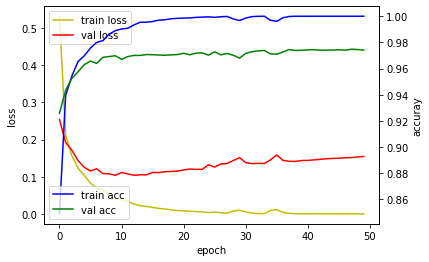

In [13]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [14]:
fig_path=make_dir('./figure')
fig.savefig(fig_path+'/'+'final'+'.png')

## (3) 모델 저장하기, 불러오기
저장하기 : model 객체의 내부 함수인 save() .h5 형식으로 저장할 수 있음 [1.모델의 구조, 2.학습된 파라미터, 3.complie() 설정]

불러오기 : load_model 함수로 .h5 파일에서 모델을 불러올 수 있음

In [15]:
from tensorflow.keras.models import load_model

In [17]:
model = 1
filename = os.listdir(model_path)[-1]
model = load_model(model_path+'/'+filename)

In [18]:
model.fit(X_train_flat, Y_train_onehot, batch_size=256, epochs=3, validation_split=0.3, verbose=2)

Epoch 1/3
165/165 - 1s - loss: 2.1607e-04 - accuracy: 1.0000 - val_loss: 0.1537 - val_accuracy: 0.9743
Epoch 2/3
165/165 - 0s - loss: 2.0178e-04 - accuracy: 1.0000 - val_loss: 0.1557 - val_accuracy: 0.9738
Epoch 3/3
165/165 - 0s - loss: 1.8562e-04 - accuracy: 1.0000 - val_loss: 0.1537 - val_accuracy: 0.9746


In [19]:
model.save(model_path+'/'+'latest_model.h5')